In [ ]:
# https://www.kaggle.com/tanmoyx/covid19-patient-precondition-dataset?select=covid.csv
# sex: Female - 1, Male - 2
# patien_type:Outpatient - 1, Inpatient - 2
# intubed:Yes - 1, No - 2, Data missing or NA - 97,98,99
# pneumonia:Yes - 1, No - 2, Data missing or NA - 97,98,99
# age: continues variable
# pregnancy Yes - 1, No - 2, Data missing or NA - 97,98,99
# diabetes Yes - 1, No - 2, Data missing or NA - 97,98,99
# copd Yes - 1, No - 2, Data missing or NA - 97,98,99
# asthma Yes - 1, No - 2, Data missing or NA - 97,98,99
# inmsupr Yes - 1, No - 2, Data missing or NA - 97,98,99
# hypertension Yes - 1, No - 2, Data missing or NA - 97,98,99
# other_disease Yes - 1, No - 2, Data missing or NA - 97,98,99
# cardiovascular Yes - 1, No - 2, Data missing or NA - 97,98,99
# obesity Yes - 1, No - 2, Data missing or NA - 97,98,99
# renal_chronic Yes - 1, No - 2, Data missing or NA - 97,98,99
# tobacco Yes - 1, No - 2, Data missing or NA - 97,98,99
# contact_other_covid Yes - 1, No - 2, Data missing or NA - 97,98,99
# covid_res Positive - 1, Negative - 2, Awaiting Results - 3
# icu Yes - 1, No - 2, Data missing or NA - 97,98,99

In [98]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

In [50]:
# read data
df = pd.read_csv('covid.csv')

df.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,2,1,04-05-2020,02-05-2020,9999-99-99,97,2,27,97,2,2,2,2,2,2,2,2,2,2,2,1,97
1,1009bf,2,1,19-03-2020,17-03-2020,9999-99-99,97,2,24,97,2,2,2,2,2,2,2,2,2,2,99,1,97
2,167386,1,2,06-04-2020,01-04-2020,9999-99-99,2,2,54,2,2,2,2,2,2,2,2,1,2,2,99,1,2
3,0b5948,2,2,17-04-2020,10-04-2020,9999-99-99,2,1,30,97,2,2,2,2,2,2,2,2,2,2,99,1,2
4,0d01b5,1,2,13-04-2020,13-04-2020,22-04-2020,2,2,60,2,1,2,2,2,1,2,1,2,2,2,99,1,2


In [51]:
df.columns

Index(['id', 'sex', 'patient_type', 'entry_date', 'date_symptoms', 'date_died',
       'intubed', 'pneumonia', 'age', 'pregnancy', 'diabetes', 'copd',
       'asthma', 'inmsupr', 'hypertension', 'other_disease', 'cardiovascular',
       'obesity', 'renal_chronic', 'tobacco', 'contact_other_covid',
       'covid_res', 'icu'],
      dtype='object')

In [52]:
df.describe()

,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
count,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000
mean,1.506726,1.215165,76.562952,1.846262,42.622483,50.400692,2.210633,2.280221,2.265029,2.319628,2.145774,2.410030,2.286157,2.138905,2.283765,2.238360,31.573034,1.728651,76.562864
std,0.499955,0.410937,39.058676,0.560939,16.659973,47.501579,5.683523,5.327832,5.334658,5.667381,5.459866,6.489959,5.438405,5.395578,5.393232,5.571901,45.082123,0.658710,39.059060
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,97.000000,2.000000,31.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,97.000000
50%,2.000000,1.000000,97.000000,2.000000,41.000000,97.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,97.000000
75%,2.000000,1.000000,97.000000,2.000000,53.000000,97.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,99.000000,2.000000,97.000000
max,2.000000,2.000000,99.000000,99.000000,120.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,99.000000,3.000000,99.000000


In [53]:
# missing values
# avoid acciendentally delete ages = 97,98,99

#intubed
df=df[df['intubed']!=99]
df=df[df['intubed']!=98]
df=df[df['intubed']!=97]

#pneumonia
df=df[df['pneumonia']!=99]
df=df[df['pneumonia']!=98]
df=df[df['pneumonia']!=97]

#pregnancy
df=df[df['pregnancy']!=99]
df=df[df['pregnancy']!=98]
df=df[df['pregnancy']!=97]

#diabetes
df=df[df['diabetes']!=99]
df=df[df['diabetes']!=98]
df=df[df['diabetes']!=97]

#copd
df=df[df['copd']!=99]
df=df[df['copd']!=98]
df=df[df['copd']!=97]

#asthma
df=df[df['asthma']!=99]
df=df[df['asthma']!=98]
df=df[df['asthma']!=97]

#inmsupr
df=df[df['inmsupr']!=99]
df=df[df['inmsupr']!=98]
df=df[df['inmsupr']!=97]

#hypertension
df=df[df['hypertension']!=99]
df=df[df['hypertension']!=98]
df=df[df['hypertension']!=97]

#other_disease
df=df[df['other_disease']!=99]
df=df[df['other_disease']!=98]
df=df[df['other_disease']!=97]	

#cardiovascular
df=df[df['cardiovascular']!=99]
df=df[df['cardiovascular']!=98]
df=df[df['cardiovascular']!=97]

#obesity
df=df[df['obesity']!=99]
df=df[df['obesity']!=98]
df=df[df['obesity']!=97]

#renal_chronic	
df=df[df['renal_chronic']!=99]
df=df[df['renal_chronic']!=98]
df=df[df['renal_chronic']!=97]

#tobacco
df=df[df['tobacco']!=99]
df=df[df['tobacco']!=98]
df=df[df['tobacco']!=97]

#contact_other_covid
df=df[df['contact_other_covid']!=99]
df=df[df['contact_other_covid']!=98]
df=df[df['contact_other_covid']!=97]

#covid_res
df=df[df['covid_res']!=99]
df=df[df['covid_res']!=98]
df=df[df['covid_res']!=97]

#icu
df=df[df['icu']!=99]
df=df[df['icu']!=98]
df=df[df['icu']!=97]

df.head()
df.describe()

,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
count,23158.0,23158.0,23158.000000,23158.000000,23158.000000,23158.000000,23158.000000,23158.000000,23158.000000,23158.000000,23158.000000,23158.000000,23158.000000,23158.000000,23158.000000,23158.000000,23158.000000,23158.000000,23158.000000
mean,1.0,2.0,1.889412,1.351585,50.538734,1.975775,1.708481,1.954098,1.966016,1.959280,1.674281,1.955825,1.946455,1.767337,1.952716,1.956084,1.693454,1.607090,1.883496
std,0.0,0.0,0.313628,0.477475,20.730387,0.153750,0.454472,0.209277,0.181192,0.197646,0.468653,0.205488,0.225123,0.422538,0.212250,0.204912,0.461069,0.693461,0.320835
min,1.0,2.0,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.0,2.0,2.000000,1.000000,37.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.0,2.0,2.000000,1.000000,52.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,1.0,2.0,2.000000,2.000000,65.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,1.0,2.0,2.000000,2.000000,115.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000


In [ ]:
# all sex = 1 and all patient_type = 2, drop the first two columns: only focus on female inpatient
# we don't care about id: drop it

In [54]:
df = df.drop(['id','sex','patient_type'], axis = 1) 

df.describe()
df.head()

,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
21,02-06-2020,02-06-2020,9999-99-99,2,2,25,2,2,2,2,2,2,2,2,2,2,2,1,1,2
30,22-06-2020,17-06-2020,9999-99-99,2,2,52,2,2,2,2,2,2,2,2,1,2,1,1,1,2
71,17-06-2020,12-06-2020,9999-99-99,2,1,51,2,2,2,2,2,2,2,2,2,2,2,1,1,2
79,08-06-2020,07-06-2020,9999-99-99,1,1,67,2,1,2,2,2,1,2,2,1,2,2,1,1,2
93,27-05-2020,27-05-2020,9999-99-99,2,1,59,2,1,2,2,2,2,2,2,2,2,2,1,1,2


In [55]:
# New column fatality: Yes-dead; No-Recovered
# df['fatality'] = np.where(df['date_died'] != '9999-99-99', 'Yes', 'No')
df['fatality'] = np.where(df['date_died'] != '9999-99-99', 1, 2)

# calculate entry - symptoms; only include valid records
df['entry_symptoms'] = pd.DataFrame(pd.to_datetime(df['entry_date']) - pd.to_datetime(df['date_symptoms']))

# dropping units
df['entry_symptoms'] = pd.to_numeric(df['entry_symptoms'].astype(str).str[:-4], errors='coerce')

# only include valid records
df = df[df['entry_symptoms'] >= 0]

df.head()

,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu,fatality,entry_symptoms
21,02-06-2020,02-06-2020,9999-99-99,2,2,25,2,2,2,2,2,2,2,2,2,2,2,1,1,2,2,0
30,22-06-2020,17-06-2020,9999-99-99,2,2,52,2,2,2,2,2,2,2,2,1,2,1,1,1,2,2,5
79,08-06-2020,07-06-2020,9999-99-99,1,1,67,2,1,2,2,2,1,2,2,1,2,2,1,1,2,2,31
93,27-05-2020,27-05-2020,9999-99-99,2,1,59,2,1,2,2,2,2,2,2,2,2,2,1,1,2,2,0
215,22-05-2020,20-05-2020,9999-99-99,2,2,52,2,1,2,2,2,1,2,1,2,2,2,2,1,2,2,2


In [56]:
# drop useless columns
df = df.drop(['entry_date','date_symptoms','date_died'], axis = 1) 

df.describe()

,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu,fatality,entry_symptoms
count,18458.000000,18458.000000,18458.000000,18458.000000,18458.000000,18458.000000,18458.000000,18458.000000,18458.000000,18458.000000,18458.000000,18458.000000,18458.000000,18458.000000,18458.000000,18458.000000,18458.000000,18458.000000,18458.000000
mean,1.889479,1.366508,50.030285,1.974808,1.711561,1.953624,1.966410,1.958338,1.681006,1.954383,1.946527,1.776303,1.951457,1.957688,1.695092,1.643407,1.883899,1.834381,34.553689
std,0.313547,0.481863,21.140026,0.156713,0.453048,0.210303,0.180176,0.199821,0.466100,0.208659,0.224980,0.416733,0.214916,0.201306,0.460381,0.702664,0.320355,0.371749,58.777321
min,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,1.000000,36.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000
50%,2.000000,1.000000,52.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,5.000000
75%,2.000000,2.000000,65.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,39.000000
max,2.000000,2.000000,115.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,335.000000


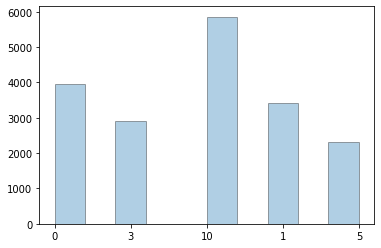

In [57]:
conditions = [
    (df['entry_symptoms'] <= 1),
    (df['entry_symptoms'] > 1) & (df['entry_symptoms'] <= 3),
    (df['entry_symptoms'] > 3) & (df['entry_symptoms'] <= 5),
    (df['entry_symptoms'] > 5) & (df['entry_symptoms'] <= 10),
    (df['entry_symptoms'] > 10)
    ]

values = ['0', '1', '3', '5','10']

df['date_diff_level'] = np.select(conditions, values)

plt.hist(df['date_diff_level'], edgecolor='k', alpha=0.35)
plt.show()

In [58]:
df.head()

,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu,fatality,entry_symptoms,date_diff_level
21,2,2,25,2,2,2,2,2,2,2,2,2,2,2,1,1,2,2,0,0
30,2,2,52,2,2,2,2,2,2,2,2,1,2,1,1,1,2,2,5,3
79,1,1,67,2,1,2,2,2,1,2,2,1,2,2,1,1,2,2,31,10
93,2,1,59,2,1,2,2,2,2,2,2,2,2,2,1,1,2,2,0,0
215,2,2,52,2,1,2,2,2,1,2,1,2,2,2,2,1,2,2,2,1


In [59]:
# no longer need entry-symptoms: drop column
df = df.drop(['entry_symptoms'], axis = 1) 

df.head()

,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu,fatality,date_diff_level
21,2,2,25,2,2,2,2,2,2,2,2,2,2,2,1,1,2,2,0
30,2,2,52,2,2,2,2,2,2,2,2,1,2,1,1,1,2,2,3
79,1,1,67,2,1,2,2,2,1,2,2,1,2,2,1,1,2,2,10
93,2,1,59,2,1,2,2,2,2,2,2,2,2,2,1,1,2,2,0
215,2,2,52,2,1,2,2,2,1,2,1,2,2,2,2,1,2,2,1


In [61]:
df.describe()

,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu,fatality
count,18458.000000,18458.000000,18458.000000,18458.000000,18458.000000,18458.000000,18458.000000,18458.000000,18458.000000,18458.000000,18458.000000,18458.000000,18458.000000,18458.000000,18458.000000,18458.000000,18458.000000,18458.000000
mean,1.889479,1.366508,50.030285,1.974808,1.711561,1.953624,1.966410,1.958338,1.681006,1.954383,1.946527,1.776303,1.951457,1.957688,1.695092,1.643407,1.883899,1.834381
std,0.313547,0.481863,21.140026,0.156713,0.453048,0.210303,0.180176,0.199821,0.466100,0.208659,0.224980,0.416733,0.214916,0.201306,0.460381,0.702664,0.320355,0.371749
min,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,36.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000
50%,2.000000,1.000000,52.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
75%,2.000000,2.000000,65.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,2.000000,2.000000,115.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000


In [62]:
df.to_csv(path_or_buf="data_ready.csv")

In [ ]:
#CLASSIFICATION TREE

In [79]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [80]:
dt = DecisionTreeClassifier() # default tree
dt.fit(x_train,y_train) 
dt.predict(x_test)

array([2, 1, 2, ..., 1, 2, 2])

In [81]:
dt.score(x_test, y_test)

0.7765438786565547

In [82]:
dt1 = DecisionTreeClassifier(random_state = 66)
score = cross_val_score(dt1,x_train,y_train,cv=10).mean()
print('gini score: %.5f'%score)
dt2 = DecisionTreeClassifier(criterion = 'entropy',random_state = 66)
score = cross_val_score(dt2,x_train,y_train,cv=10).mean()
print('entropy score: %.5f'%score)

gini score: 0.77841
entropy score: 0.77888




It can be seen above that the result using entropy is slightly better than using gini.



best parameter and score: [1.         0.84326627]


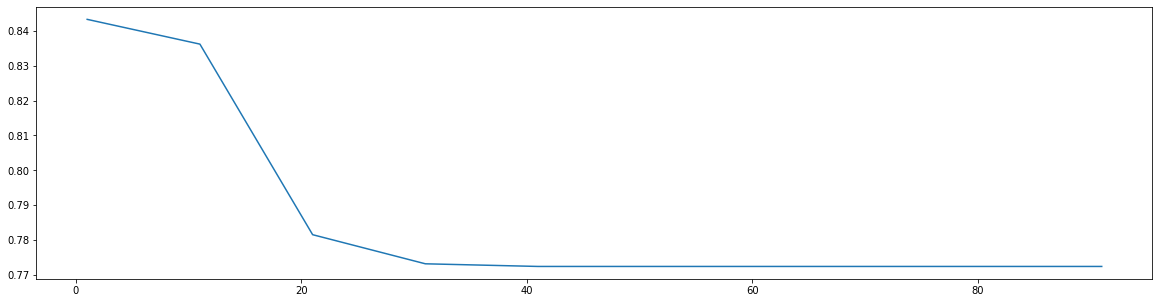

In [84]:
# draw the plot for parameter:max_depth
ScoreAll = []
for i in range(1,100,10):
    dt = DecisionTreeClassifier(criterion = 'entropy',max_depth = i,random_state = 66)
    score = cross_val_score(dt,x,y,cv=10).mean()
    ScoreAll.append([i,score])
ScoreAll = np.array(ScoreAll)

max_score = np.where(ScoreAll==np.max(ScoreAll[:,1]))[0][0]
print("best parameter and score:",ScoreAll[max_score])  
# print(ScoreAll[,0])
plt.figure(figsize=[20,5])
plt.plot(ScoreAll[:,0],ScoreAll[:,1])
plt.show()

In [85]:
param = {'criterion':['gini'],'max_depth':[15,20,30,50,60,100],'min_samples_leaf':[2,3,5,10],'min_impurity_decrease':[0.1,0.2,0.5,0.7]}
grid = GridSearchCV(DecisionTreeClassifier(),param_grid=param,cv=10)
grid.fit(x_train,y_train)
print('best classifier:',grid.best_params_,'best score:', grid.best_score_)

best classifier: {'criterion': 'gini', 'max_depth': 15, 'min_impurity_decrease': 0.1, 'min_samples_leaf': 2} best score: 0.8348232519224311


In [86]:
dt3 = DecisionTreeClassifier(max_depth=15,min_samples_leaf=2,min_impurity_decrease=0.1)
dt3.fit(x_train,y_train)
y_pred = dt3.predict(x_test)
print('train set score', dt3.score(x_train,y_train),'test set score',dt3.score(x_test,y_test))

train set score 0.8348232425843153 test set score 0.83261105092091


In [ ]:
# RANDOM FOREST

In [64]:
y = df['fatality']
x = df.drop('fatality',axis = 1)

In [65]:
# all default
rf0 = RandomForestClassifier(oob_score=True, random_state=10)
rf0.fit(x,y)
print(rf0.oob_score_)
y_predprob = rf0.predict_proba(x)[:,1]
print("AUC Score (Train): %f" % metrics.roc_auc_score(y, y_predprob))

0.8252248347599956
AUC Score (Train): 0.990963


In [66]:
print(rf0.feature_importances_)

[0.12004049 0.0456253  0.42619197 0.00258172 0.02771941 0.01518592
 0.00950621 0.01235143 0.02652667 0.01306905 0.01601859 0.02990498
 0.0152589  0.0142912  0.02859993 0.06717499 0.02562033 0.10433292]


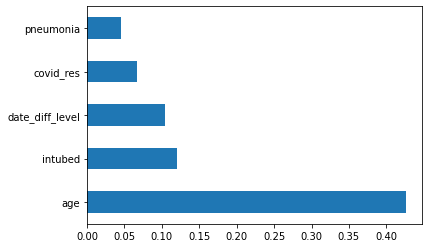

In [67]:
feat_importances = pd.Series(rf0.feature_importances_, index=x.columns)
feat_importances.nlargest(5).plot(kind='barh')

In [70]:
param_test1 = {'n_estimators':range(10,201,10)}
gsearch1 = GridSearchCV(estimator = RandomForestClassifier(min_samples_split=100,
                                  min_samples_leaf=20,max_depth=8,max_features='sqrt',random_state=10), 
                       param_grid = param_test1, scoring='roc_auc',cv=5)
gsearch1.fit(x,y)
print(gsearch1.best_params_, gsearch1.best_score_)

{'n_estimators': 70} 0.8173103675660242


In [72]:
param_test2 = {'max_depth':range(2,18,2)}
gsearch2 = GridSearchCV(estimator = RandomForestClassifier(n_estimators=70,min_samples_split=100, 
                                  min_samples_leaf=20,max_features='sqrt',oob_score=True, random_state=10),
   param_grid = param_test2, scoring='roc_auc',iid=False, cv=5)
gsearch2.fit(x,y)
print(gsearch2.best_params_, gsearch2.best_score_)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


{'max_depth': 8} 0.8173103675660242


In [73]:
param_test3 = {'min_samples_split':range(80,150,20), 'min_samples_leaf':range(5,50,5)}
gsearch3 = GridSearchCV(estimator = RandomForestClassifier(n_estimators=70, max_depth=8,
                                  max_features='sqrt' ,oob_score=True, random_state=10),
   param_grid = param_test3, scoring='roc_auc',iid=False, cv=5)
gsearch3.fit(x,y)
print(gsearch3.best_params_, gsearch3.best_score_)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


{'min_samples_leaf': 10, 'min_samples_split': 80} 0.8182691645547792


In [74]:
param_test4 = {'max_features':range(2,18,1)}
gsearch4 = GridSearchCV(estimator = RandomForestClassifier(n_estimators=70, max_depth=8, min_samples_split=80,
                                  min_samples_leaf=10 ,oob_score=True, random_state=10),
   param_grid = param_test4, scoring='roc_auc',iid=False, cv=5)
gsearch4.fit(x,y)
print(gsearch4.best_params_, gsearch4.best_score_)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


{'max_features': 4} 0.8182691645547792


In [75]:
rf1 = RandomForestClassifier(n_estimators= 70, max_depth=8, min_samples_split=80,
                                  min_samples_leaf=10,max_features=4 ,oob_score=True, random_state=10)
rf1.fit(x,y)
rf1.oob_score_

0.8590313143352476

In [77]:
print(rf1.feature_importances_)

[0.42408717 0.12972798 0.15079871 0.00139062 0.02527071 0.00403375
 0.00133224 0.0023524  0.02621899 0.00175527 0.00342501 0.00564984
 0.00579134 0.0020879  0.01153909 0.15610273 0.03071886 0.01771739]


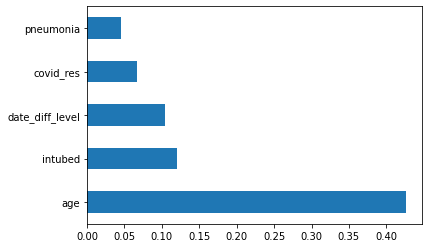

In [78]:
feat_importances = pd.Series(rf0.feature_importances_, index=x.columns)
feat_importances.nlargest(5).plot(kind='barh')

In [ ]:
#BOOSTING

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [108]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(x_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training):", gb_clf.score(x_train, y_train))
    print("Accuracy score (validation)",gb_clf.score(x_test, y_test))

Learning rate:  0.05
Accuracy score (training): 0.8348232425843153
Accuracy score (validation) 0.83261105092091
Learning rate:  0.075
Accuracy score (training): 0.8348232425843153
Accuracy score (validation) 0.83261105092091
Learning rate:  0.1
Accuracy score (training): 0.8397670323716646
Accuracy score (validation) 0.8388407367280607
Learning rate:  0.25
Accuracy score (training): 0.8545984017337126
Accuracy score (validation) 0.8534669555796316
Learning rate:  0.5
Accuracy score (training): 0.8545306785859407
Accuracy score (validation) 0.855092091007584
Learning rate:  0.75
Accuracy score (training): 0.8548692943248002
Accuracy score (validation) 0.8567172264355363
Learning rate:  1
Accuracy score (training): 0.8533116619260463
Accuracy score (validation) 0.8545503791982665


In [ ]:
# select learning rate = 0.75

In [97]:
gb_clf2 = GradientBoostingClassifier(n_estimators=20, learning_rate=0.75, max_features=2, max_depth=2, random_state=0)
gb_clf2.fit(x_train, y_train)
predictions = gb_clf2.predict(x_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix:
[[ 154  464]
 [  65 3009]]
Classification Report
              precision    recall  f1-score   support

           1       0.70      0.25      0.37       618
           2       0.87      0.98      0.92      3074

    accuracy                           0.86      3692
   macro avg       0.78      0.61      0.64      3692
weighted avg       0.84      0.86      0.83      3692



In [109]:
gb_clf2.feature_importances_

array([3.82104872e-01, 1.81913329e-01, 7.75160802e-02, 3.96470952e-03,
       1.80246054e-02, 7.19061622e-04, 4.49845684e-04, 2.18785324e-04,
       1.08708797e-01, 1.01214500e-03, 7.79165942e-04, 5.15157284e-03,
       0.00000000e+00, 1.81211554e-03, 1.91654633e-02, 1.71416604e-01,
       2.41496573e-02, 2.89319013e-03])

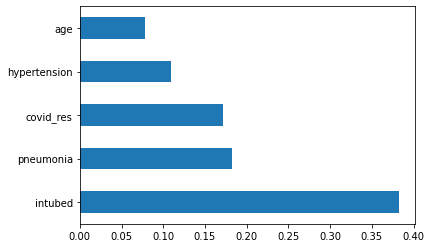

In [110]:
feat_importances = pd.Series(gb_clf2.feature_importances_, index=x.columns)
feat_importances.nlargest(5).plot(kind='barh')

In [ ]:
x_train['date_diff_level'] = pd.to_numeric(x_train['date_diff_level'])
x_test['date_diff_level'] = pd.to_numeric(x_test['date_diff_level'])

In [106]:
xgb_clf3 = XGBClassifier()
xgb_clf3.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [107]:
score = xgb_clf3.score(x_test, y_test)
print(score)

0.8580715059588299


In [113]:
xgb_clf3.feature_importances_

array([0.34893763, 0.24987316, 0.05811411, 0.00360326, 0.02819734,
       0.01367755, 0.01048905, 0.01532699, 0.03117329, 0.01278323,
       0.0086069 , 0.01742312, 0.01083909, 0.00928206, 0.02856785,
       0.13041076, 0.00714213, 0.01555254], dtype=float32)

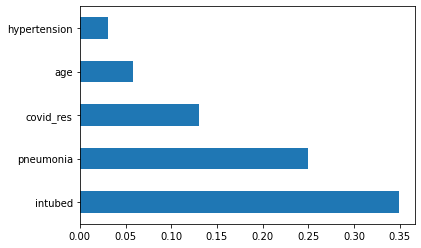

In [114]:
feat_importances = pd.Series(xgb_clf3.feature_importances_, index=x.columns)
feat_importances.nlargest(5).plot(kind='barh')

END OF CODE
